In [16]:
# notebook dependencies 
import os # used in caching
import pandas as pd
import numpy as np

# visualization imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# regular expression import
import re

# JSON import
import json

# importing BeautifulSoup for parsing HTML/XTML
from bs4 import BeautifulSoup as BSoup

# request module for connecting to APIs
from requests import get

# text prepare modules
import acquire
import prepare

# uni-code library
import unicodedata

# natural language toolkit library/modules
import nltk
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer

from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

#sklearn
from sklearn.model_selection import train_test_split

# Wrangling

### Data Acquisition

In [2]:
# Reading in data
df = pd.read_csv('metaverse.csv')

In [3]:
df

,repo,language,readme_contents
0,M3-org/awesome-metaverse,NaN,# Awesome Metaverse [![Awesome](https://awesom...
1,mvs-org/metaverse,C++,Metaverse Core Integration/staging Tree\n=====...
2,webaverse/app,JavaScript,"<img src=""docs/banner.jpeg"" width=100% />\n\n<..."
3,shadowcz007/awesome-metaverse,NaN,"# awesome-metaverse\n<a href=""https://awesome...."
4,vircadia/vircadia,C++,"<p align=""center""><a href=""https://vircadia.co..."
...,...,...,...
993,LinasKo/MetaVerse,C#,# MetaVerse\nVirtual Conference project for Me...
994,saiva11/Metaverse,Vue,NaN
995,dimplehh/metaverse,NaN,# 맥스트 VPS SDK 사용\n\n## VPS 사용\n\nAssets\MaxstA...
996,niksanvijan/MetaVerse,NaN,NaN


In [4]:
# Looking at messy reame_contents
df.readme_contents

0      # Awesome Metaverse [![Awesome](https://awesom...
1      Metaverse Core Integration/staging Tree\n=====...
2      <img src="docs/banner.jpeg" width=100% />\n\n<...
3      # awesome-metaverse\n<a href="https://awesome....
4      <p align="center"><a href="https://vircadia.co...
                             ...                        
993    # MetaVerse\nVirtual Conference project for Me...
994                                                  NaN
995    # 맥스트 VPS SDK 사용\n\n## VPS 사용\n\nAssets\MaxstA...
996                                                  NaN
997                                                  NaN
Name: readme_contents, Length: 998, dtype: object

In [5]:
df.isnull().sum()

repo                 0
language           316
readme_contents    257
dtype: int64

### Data Preparation - Cleaning

In [7]:
# Calling prepare function to clean dataframe
df = prepare.clean_data_objects(df)
df.head()

df shape: (998, 3)


,repo,language,readme_contents
0,M3-org/awesome-metaverse,nan,# Awesome Metaverse [![Awesome](https://awesom...
1,mvs-org/metaverse,C++,Metaverse Core Integration/staging Tree\n=====...
2,webaverse/app,JavaScript,"<img src=""docs/banner.jpeg"" width=100% />\n\n<..."
3,shadowcz007/awesome-metaverse,nan,"# awesome-metaverse\n<a href=""https://awesome...."
4,vircadia/vircadia,C++,"<p align=""center""><a href=""https://vircadia.co..."


In [8]:
# Calling mass_text_clean function to clean readme content
df["readme_contents"] = df["readme_contents"].apply(prepare.mass_text_clean)
df.head()

,repo,language,readme_contents
0,M3-org/awesome-metaverse,nan,awesome awesome awesome badge svg awesome list...
1,mvs-org/metaverse,C++,core integration staging tree build status tra...
2,webaverse/app,JavaScript,img src doc banner jpeg width 100 align center...
3,shadowcz007/awesome-metaverse,nan,awesome href awesome target blank img alt awes...
4,vircadia/vircadia,C++,align center href vircadia img src interface r...


In [9]:
df.language.value_counts()

nan                 316
JavaScript          266
C#                   78
HTML                 72
TypeScript           70
Solidity             27
CSS                  23
Python               22
Rust                 16
Go                   15
C++                  14
Jupyter Notebook     11
Java                  7
ShaderLab             7
SCSS                  6
Vue                   5
Shell                 5
PHP                   5
SuperCollider         3
Clojure               3
Batchfile             2
Roff                  2
Swift                 2
C                     2
GLSL                  2
GDScript              2
Objective-C           2
Kotlin                2
HCL                   1
EJS                   1
PowerShell            1
Svelte                1
TeX                   1
Objective-C++         1
Cadence               1
Metal                 1
R                     1
LSL                   1
ASP.NET               1
Name: language, dtype: int64

In [96]:
# Update language function to reduce noises in language, function writeen by B.G.

def update_languages(df):
    ''' Dataset has multiple languages.  SOme languages are itterations of other languages.
    This function is to replace some of the languages names so the are in the same category'''
    # Jupyter notebook as Python
    df=df.replace('Jupyter Notebook', 'Python')
    # C Related Languages
    df=df.replace(('Objective-C++','Objective-C','C','C++','C#','SuperCollider','GLSL'),'C')
    # Java Related Languages ans sublanguages
    df=df.replace(('JavaScript', 'Vue','Clojure','Kotlin','EJS'), 'Java')
    # TypeScript Languages
    df=df.replace('Svelte','TypeScript')
    # Microsoft languages for windows applications
    df=df.replace(('PowerShell','Batchfile','Shell'),'Microsoft')
    # iOS related languages
    df=df.replace(('Metal','Swift'),'iOS')
    # languages with < 10 usage
    df=df.replace(('Microsoft','ShaderLab','SCSS','PHP','iOS','GDScript','Roff','HCL','TeX', 'Cadence','R','LSL','ASP.NET'),'other')
    # NaNs
    df=df.replace('nan', 'text')
    return df

In [97]:
# Using function to clean language
df = update_languages(df)

In [98]:
# Check the cleaned language
df.language.value_counts()

text          316
Java          284
C             102
HTML           72
TypeScript     71
other          39
Python         33
Solidity       27
CSS            23
Rust           16
Go             15
Name: language, dtype: int64

### Data Preparation - Splitting

In [13]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [14]:
# Calling function to split data into train, validate, test
train, validate, test = train_validate_test_split(df, 'language')

***

# Explore

## Target Variable Univariate Analysis

#### Train Language Percentages

In [15]:
labels = pd.concat([train.language.value_counts(),
                    train.language.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
nan,177,0.317204
Java,159,0.284946
C,57,0.102151
TypeScript,40,0.071685
HTML,40,0.071685
other,22,0.039427
Python,18,0.032258
Solidity,15,0.026882
CSS,13,0.023297
Rust,9,0.016129


In [36]:
labels.index

Index(['nan', 'Java', 'C', 'TypeScript', 'HTML', 'other', 'Python', 'Solidity',
       'CSS', 'Rust', 'Go'],
      dtype='object')

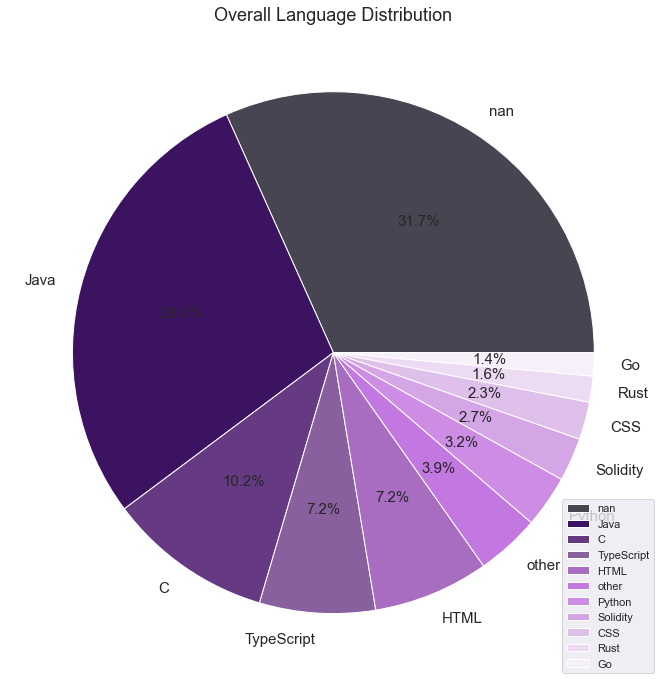

In [42]:
plt.figure(figsize=(16,12))
mylabels = ['nan', 'Java', 'C', 'TypeScript', 'HTML', 'other', 'Python', 'Solidity',
       'CSS', 'Rust', 'Go']
mycolors = ['#484553', '#3c1361', '#663a82', '#89609e', '#a86cc1', '#c377e0', '#cd8de5', '#d5a6e6', '#dfc0eb', '#eddbf4', '#f7f0fa']
textprops = {"fontsize":15}
plt.pie(labels.percent, labels = mylabels, colors = mycolors, textprops=textprops, autopct='%.1f%%')
plt.legend()
plt.title('Overall Language Distribution',fontsize=18)
plt.show() 


### Takeaway: Besides the NaN values, Java and C/C++ are the most common languages for metaverse repos.

***

## Question 1: What are the most common words in READMEs?

In [43]:
train.head()

,repo,language,readme_contents
888,Project-metaverse/METAVERSE,nan,nan
36,facemoji/alter-core,other,h1 align center discontinued h1 due change hor...
119,mvs-org/mvsd-mysql-sync,nan,mysql sync docker image sync mvsd mysql setup ...
729,zdjiangfdu/Metaverse,nan,project application
363,vinlandstudios/vinland-website,Java,vinland multichain defi vinland multichain def...


In [44]:
# Pull all text from readme_contents together
all_content = ' '.join(train.readme_contents)

In [57]:
# Look at all content
all_content[:100]

'nan h1 align center discontinued h1 due change horizon weve disabled new api key generation alter st'

In [47]:
# The most frequent words from all content
pd.Series(all_content.split()).value_counts().head(20)

0              961
app            639
doc            548
create         526
img            503
next           501
project        478
run            445
build          443
npm            388
open           371
src            336
tailwindcss    336
href           332
vercel         331
www            325
address        323
react          310
world          306
user           283
dtype: int64

In [64]:
# Store content frequency into dataframe
all_freq = pd.DataFrame(pd.Series((all_content.split())).value_counts().head(20), columns = ['Frequency'])

In [65]:
all_freq

,Frequency
0,961
app,639
doc,548
create,526
img,503
next,501
project,478
run,445
build,443
npm,388


**Seaborn palette**
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

<AxesSubplot:title={'center':'Top 20 Most Common Words in Metaverse READMEs'}, xlabel='Words', ylabel='Frequency'>

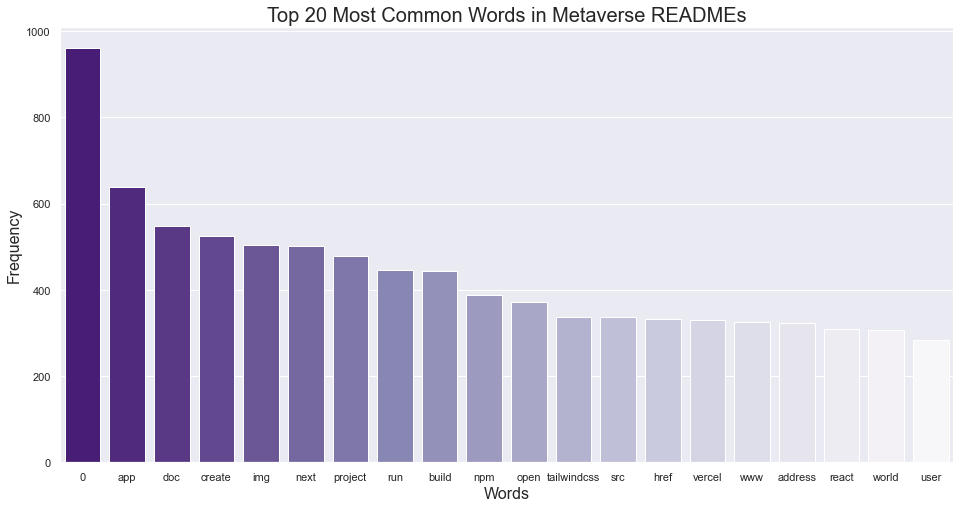

In [93]:
# Visualize most frequent words
plt.figure(figsize = (16,8))
plt.xlabel('Words', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.title('Top 20 Most Common Words in Metaverse READMEs', fontsize = 20)
sns.barplot(x=all_freq.index, y=all_freq.Frequency, palette ='Purples_r')

### Takeaway: '0', 'app', 'doc', 'create', 'img', 'next', 'project', 'run', etc. are the most common words.

***

## Question 2: Does the length of the README vary by programming language?

In [94]:
train.language.value_counts()

nan           177
Java          159
C              57
TypeScript     40
HTML           40
other          22
Python         18
Solidity       15
CSS            13
Rust            9
Go              8
Name: language, dtype: int64

### Takeaway:

***

## Question 3: Do different programming languages use a different number of unique words?

### Takeaway:

***

## Question 4: Are there any words that uniquely identify a programming language?

### Takeaway:

***